# Embeddings

In [1]:
import nltk
nltk.download('brown')
nltk.download('webtext')
nltk.download('punkt')
# !pip install gensim==4.1.2

[nltk_data] Downloading package brown to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kamiljedryczek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# from gensim.test.utils import common_texts
from nltk.corpus import brown    
sentences = brown.sents()
from gensim.models import Word2Vec



In [3]:
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.save("word2vec.model")

In [4]:
model.wv['computer']

array([ 0.01542845,  0.14390653, -0.01029331,  0.03453916, -0.08579704,
       -0.21079381,  0.09966087,  0.39719805, -0.04539392, -0.1951939 ,
        0.08989877, -0.29372728,  0.06357561, -0.02595259,  0.0797992 ,
       -0.05369091,  0.16931267, -0.01646819, -0.13243099, -0.14058194,
        0.26949087,  0.0150059 ,  0.1039385 ,  0.04544323,  0.10827827,
        0.06008592, -0.27658778,  0.01691817, -0.08086421,  0.00829271,
        0.11491624, -0.04844885,  0.13329665, -0.15241314, -0.01042587,
       -0.1722569 ,  0.08079166, -0.18984303, -0.05938678, -0.04236454,
       -0.00892058, -0.12664902, -0.04440002, -0.00091922, -0.05455324,
       -0.05290395, -0.11463075, -0.01090625, -0.08332631,  0.13167171,
        0.04102905, -0.15201662, -0.28859523,  0.00994872, -0.02703028,
       -0.05518848,  0.21090433, -0.18373013,  0.06009957,  0.03777416,
       -0.13237394,  0.03230786,  0.07311246,  0.09266839, -0.09826264,
        0.20716098,  0.00764907,  0.18341093, -0.2125551 ,  0.21

In [5]:
model.wv.most_similar('wine', topn=10)

[('thick', 0.846562922000885),
 ('fruit', 0.8461551070213318),
 ('cathedral', 0.8409650325775146),
 ('snake', 0.8400936126708984),
 ('figure', 0.8366981148719788),
 ('reservoir', 0.8341946601867676),
 ('paw', 0.8335599303245544),
 ('wood', 0.8332733511924744),
 ('solid', 0.832988440990448),
 ('tension', 0.8327223658561707)]

In [6]:
from nltk.corpus import webtext   
sentences = webtext.sents()

model2 = Word2Vec.load("word2vec.model")
model2.train(sentences, total_examples=1, epochs=4)

(1108702, 1587168)

In [7]:
model2.wv.most_similar('wine', topn=10)

[('fruit', 0.8499957919120789),
 ('thick', 0.8432979583740234),
 ('snake', 0.8388535976409912),
 ('figure', 0.837454617023468),
 ('cathedral', 0.8362568616867065),
 ('paw', 0.8316439390182495),
 ('reservoir', 0.8311736583709717),
 ('solid', 0.828296422958374),
 ('pigment', 0.8279564380645752),
 ('tension', 0.827664852142334)]

In [8]:
model2.wv.most_similar('witcher', topn=10)

KeyError: "Key 'witcher' not present"

In [9]:
model.wv.most_similar(model.wv['father'] - model.wv['man'] + model.wv['women'], topn=10)

[('Places', 0.632251501083374),
 ('upgraded', 0.6062009334564209),
 ('handsomely', 0.601911187171936),
 ('lances', 0.6003702878952026),
 ('in-laws', 0.5959280133247375),
 ('epicyclically', 0.5954881906509399),
 ('identifying', 0.5947790741920471),
 ('Sipping', 0.5913369655609131),
 ('Irishmen', 0.5836254954338074),
 ('barnyards', 0.5834058523178101)]

In [10]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

In [12]:
w2v_vectors.most_similar(w2v_vectors['dog'])

[('dog', 1.0),
 ('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159)]

In [13]:
w2v_vectors.most_similar(w2v_vectors['father'] - w2v_vectors['man'] + w2v_vectors['women'], topn=10)

[('women', 0.6575702428817749),
 ('husbands', 0.5938421487808228),
 ('mothers', 0.5741605758666992),
 ('daughters', 0.5590043067932129),
 ('father', 0.5534617900848389),
 ('fathers', 0.5441720485687256),
 ('sisters', 0.5315889120101929),
 ('sons', 0.5195902585983276),
 ('children', 0.5147565007209778),
 ('wives', 0.5111095309257507)]

In [14]:
w2v_vectors.most_similar(w2v_vectors['death'] - w2v_vectors['man'] + w2v_vectors['computer'], topn=10)

[('computer', 0.6250295639038086),
 ('death', 0.5794907808303833),
 ('computers', 0.5006648302078247),
 ('Company_Nasdaq_ATAI', 0.44406792521476746),
 ('PCs', 0.4163816571235657),
 ('Disk_fragmentation', 0.3987767994403839),
 ('Computer', 0.38946494460105896),
 ('daughter_Tomasita', 0.38889190554618835),
 ('untimely_death', 0.38871726393699646),
 ('PC', 0.38824915885925293)]

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition  import PCA
import numpy as np

def to_2d(embeddings):
    # To reduce embedding dims without losing much information we use PCA
    pca = PCA(n_components=2, whiten=True)
    pca.fit(embeddings)
    return pca.transform(embeddings)


def annotated_scatter(points, names, color='blue'):
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    plt.scatter(x_coords, y_coords, c=color)
    for label, x, y in zip(names, x_coords, y_coords):
                      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() - .5, x_coords.max() + .5)
    plt.ylim(y_coords.min() - .5, y_coords.max() + .5)

    
def plot_embeddings(embeddings, names, color='blue', show=True):
    X_train = np.array([embeddings[k] for k in names])
    embeddings_2d = to_2d(X_train)
    
    annotated_scatter(embeddings_2d, names, color)
    plt.grid()
    
    if show:
        plt.show()

In [16]:
near_dog = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['dog'])]
near_computer = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['computer'])]

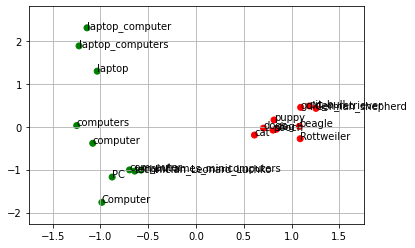

In [17]:
plot_embeddings(w2v_vectors, 
                near_dog + near_computer, 
                color=['red'] * len(near_dog) + ['green'] * len(near_computer))

In [18]:
from collections import namedtuple
import matplotlib.lines as mlines
from matplotlib import cm

LinearSubs = namedtuple('LinearSubs', 
                        ('word_pair', 'name'))

def plot_linear_substructures(linear_subs, embeddings):
    embeddings_matrix = [embeddings[p] for ls in linear_subs for p in ls.word_pair]
    embeddings_matrix = np.array(embeddings_matrix)
    pair_names = [p for ls in linear_subs for p in ls.word_pair]
    ls_names = [ls.name for ls in linear_subs]
    embeddings_2d = to_2d(embeddings_matrix)
    annotated_scatter(embeddings_2d, 
                      pair_names, 
                      cm.Set1.colors[:len(embeddings_2d)])
    
    for i in range(0, len(embeddings_2d), 2):
        p1 = embeddings_2d[i]
        p2 = embeddings_2d[i + 1]
        # Center of the linear substructure
        center = [(p1[i] + p2[i]) / 2 + .04 for i in range(2)]
        
        plt.plot(*zip(p1, p2), '--')
        plt.annotate(ls_names[i // 2], 
                     xy=center, 
                     xytext=(0, 0), textcoords='offset points')

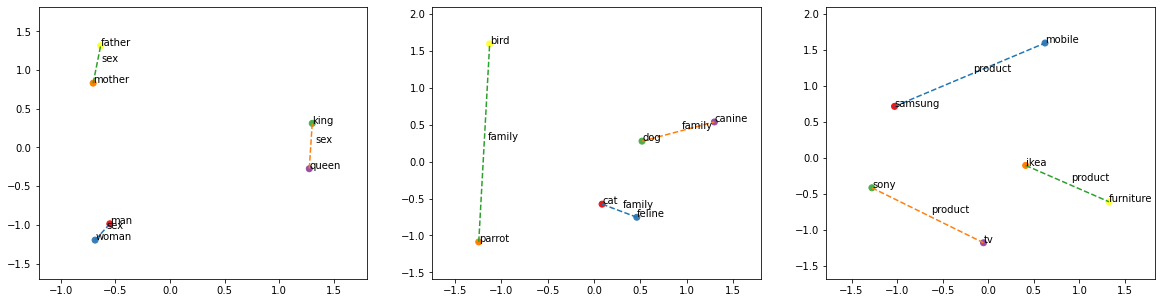

In [19]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], w2v_vectors)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], w2v_vectors)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], w2v_vectors)

In [20]:
#Glove 6B

!curl -OL http://nlp.stanford.edu/data/glove.6B.zip -o glove.6B.zip
#wget
# !wget http://nlp.stanford.edu/data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   308    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   346    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  822M  100  822M    0     0  1597k      0  0:08:47  0:08:47 --:--:-- 2250k   0     0   655k      0  0:21:23  0:00:07  0:21:16  935k39k      0  0:21:56  0:00:13  0:21:43  588k    0     0   620k      0  0:22:37  0:00:16  0:22:21  525k    0   554k      0  0:25:17  0:00:41  0:24:36  638k6 51.5M    0     0   654k      0  0:21:27  0:01:20  0:20:07 1655k   0   905k      0  0:15:30  0:01:52  0:13:38 1336k 0     0   920k      0  0:15:15  0:02:04  0:13:11 1278k   0     0   927k      0  0:15:07  0:02:06  0:13:01 1417k    0  1187k      0  0:11:48  0:03:05  0:08:43 1902k 1288k      0  0:10:53  0:03:21  0:07:32 2339k   0     0  1319k      0  0:10:38  0:03:27  0:07:11 2333k  0  1347k   

In [21]:
!unzip -o glove.6B.zip
# !unzip -o /content/glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [22]:
glove_embeddings = {}
with open('glove.6B.300d.txt') as f:
    glove_embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float') for l in f}

In [23]:
def get_closest(x, embeddings, topn=3):
    """
    Get the closest embeddings calculating the euclidean distance
    Parameters
    ----------
    x: np.ndarray
      Vector containing an embedding
    top_k: int, optional
      Get the top k similar embeddings
    Returns
    -------
    dict
      Dict containing the top k similar embeddings to the given x
    """
    # Stack all embeddings in a single matrix. Note: the matrix dimention will be
    # V x D where V is the vocabulary size and D is the embedding dimension
    embedding_matrix = np.array(list(embeddings.values()))
    # Using broadcasting compute distance to each embedding in our vocabulary
    distances = x - embedding_matrix
    # Comoute the magnitude of each distance
    distances = np.linalg.norm(distances, axis=1)
    # Sort distance and keep the smallest k
    min_idx = np.argsort(distances)[:topn]
    return [list(embeddings)[i] for i in min_idx]

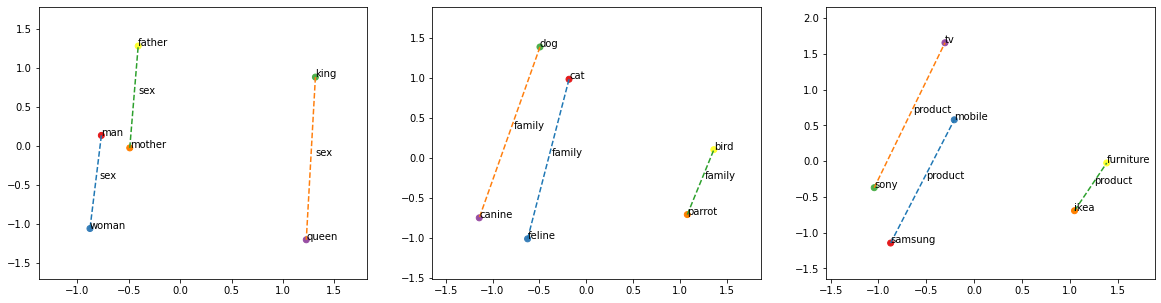

In [24]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], glove_embeddings)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], glove_embeddings)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], glove_embeddings)

In [25]:
get_closest(glove_embeddings['king'] - glove_embeddings['man'] + glove_embeddings['woman'], glove_embeddings)

['king', 'queen', 'monarch']

In [26]:
# vectors = {name: gensim.downloader.load(name) for name in list(gensim.downloader.info()['models'].keys())}

In [27]:
# word1 = 'king'
# word2 = 'man'
# word3 = 'woman'
# for name, vector in vectors.items():
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)

In [28]:
# word1 = 'father'
# word2 = 'man'
# word3 = 'woman'
# for vector, name in zip(vectors, gensim.downloader.info()['models'].keys()):
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)

In [ ]:
# word1 = 'death'
# word2 = 'man'
# word3 = 'computer'
# for vector, name in zip(vectors, gensim.downloader.info()['models'].keys()):
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)

Embedding: fasttext-wiki-news-subwords-300
('man', 0.7935950756072998)
('turnoff', 0.7012911438941956)
('woman', 0.6520333290100098)
('man-love', 0.6380185484886169)
('cowman', 0.6044278144836426)
('blackman', 0.5975620150566101)
('man--and', 0.5969740152359009)
('man--', 0.5941734910011292)
('boy-man', 0.5879694223403931)
('turn-off', 0.5870673656463623)
------------------------------------------------------------
Calcuation not possible for conceptnet-numberbatch-17-06-300
------------------------------------------------------------
Calcuation not possible for word2vec-ruscorpora-300
------------------------------------------------------------
Embedding: word2vec-google-news-300
('turnoff', 0.7237362265586853)
('man', 0.49477481842041016)
('woman', 0.39133355021476746)
('shooter_balding_##ish', 0.3738951086997986)
('Gwydir_Highway', 0.37055811285972595)
('quaint_confection', 0.3693695068359375)
('passerby', 0.36667531728744507)
('Otira', 0.366344690322876)
('Gower_Gulch', 0.362788528